 ### In this jupyter we test the functions before putting them in exercice.py

In [153]:
import numpy as np
import pandas as pd

# Check uniqueness

In [154]:
import random # we use random the generate example lists
randomlist  = [random.randint(0,100) for i in range(20)]
print(randomlist)

[82, 51, 14, 19, 8, 7, 52, 19, 93, 53, 23, 44, 75, 10, 29, 55, 76, 85, 66, 99]


In [155]:
def check_uniqueness(lst):
    """
    Check if a list contains only unique values.
    Returns True only if all values in the list are unique, False otherwise
    """
    nb_unique_elements  = len(set(lst)) # we get the number of unique values
    if nb_unique_elements == len(lst):
        return True
    else :
        return False

In [156]:
check_uniqueness(randomlist)

False

## Smallest difference

In [157]:
def smallest_difference(array):
    """
    Code a function that takes an array and returns the smallest
    absolute difference between two elements of this array
    Please note that the array can be large and that the more
    computationally efficient the better
    """
    
    flat_array = array.flatten() # we flatten the array to have a (n,) dimension
    flat_array = np.array(sorted(flat_array)) # we sort the flat array in ascending order and make sure the result is an array 
    
    consecutive_differences = flat_array[1:] - flat_array[:-1] # we calculate the differences of side by side elements 
    
    return(min(consecutive_differences))

In [158]:
# we create a random array 
random_array = np.random.randint(1,100, size=(4,4))
print(random_array)

[[10 65 25 75]
 [34 75 93 81]
 [38 21 36 64]
 [17 64 65 20]]


In [159]:
smallest_difference(random_array)

0

## Macd

In [160]:
input_data = pd.read_csv("data/data.csv")
input_data.head()

,date,SX5T Index
0,2000-01-03,6067.89
1,2000-01-04,5828.40
2,2000-01-05,5683.15
3,2000-01-06,5631.77
4,2000-01-07,5816.44


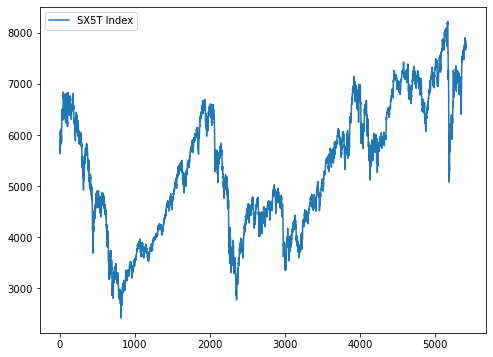

In [161]:
input_data.plot(figsize = (8,6))

In [162]:
def macd(prices, window_short=12, window_long=26):
    """
    Code a function that takes a DataFrame named prices and
    returns it's MACD (Moving Average Convergence Difference) as
    a DataFrame with same shape
    Assume simple moving average rather than exponential moving average
    The expected output is in the output.csv file
    """
    numerical_col_names = prices.select_dtypes(include=np.number).columns # we select only the cumerical columns
    df_result = pd.DataFrame()
    for col_name in numerical_col_names:
        df_result["MACD "+col_name] = prices[col_name].rolling(window=window_short).mean() - prices[col_name].rolling(window=window_long).mean()
    
    return df_result
    

In [163]:
df_result = macd(input_data)

In [164]:
output_data = pd.read_csv("data/output.csv")
output_data.head()

,date,SX5T Index,macd_12_26
0,2000-01-03,6067.89,NaN
1,2000-01-04,5828.40,NaN
2,2000-01-05,5683.15,NaN
3,2000-01-06,5631.77,NaN
4,2000-01-07,5816.44,NaN


In [165]:
import matplotlib.pyplot as plt 

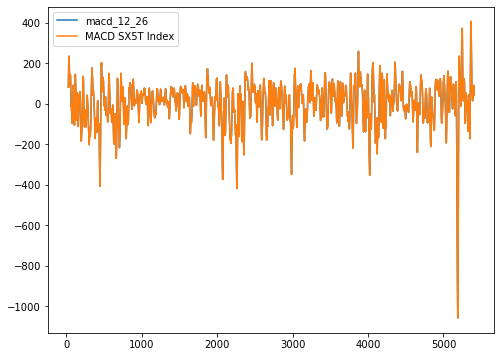

In [166]:
output_data.macd_12_26.plot(figsize = (8,6))
df_result["MACD SX5T Index"].plot()
plt.legend()
plt.show()

## Sortino ratio

In [167]:
def sortino_ratio(prices):
    """
    Code a function that takes a DataFrame named prices and
    returns the Sortino ratio for each column
    Assume risk-free rate = 0
    On the given test set, it should yield 0.05457
    """
    risk_free_rate = 0
    prices = prices.select_dtypes(include=np.number) # we select only numerical columns
    returns = prices.pct_change() # the calculate the returns for all columns
    returns = returns.dropna()
    
    def downside_deviation(x):
        return np.std(np.minimum(0,x))
    
    def daily_retun_2_annual(x):
        cumulative_return = (x+1).prod()
        ann_return = cumulative_return**(252/len(x)) - 1 # 252 number of open days in a year
        return ann_return
    
    result = returns.apply(lambda x: (daily_retun_2_annual(x) - risk_free_rate)/downside_deviation(x), axis=0) # we calculathe the ratio
    
    return result

In [168]:
sortino_ratio(input_data)

SX5T Index    1.208294
dtype: float64

#### The resulting values is not the one expected. I must have implemented a wrong formula for the downside deviation. It might also be due to considering annual returns

## Expected_shortfall

In [169]:
input_data_test = input_data.copy()
input_data_test["SX5T Index 2"] = input_data["SX5T Index"]

In [170]:
input_data_test.head() # we create the 

,date,SX5T Index,SX5T Index 2
0,2000-01-03,6067.89,6067.89
1,2000-01-04,5828.40,5828.40
2,2000-01-05,5683.15,5683.15
3,2000-01-06,5631.77,5631.77
4,2000-01-07,5816.44,5816.44


In [171]:
def expected_shortfall(prices, level=0.95):
    """
    Code a function that takes a DataFrame named prices and
    returns the expected shortfall at a given level
    On the given test set, it should yield -0.03468
    """ 
    prices = prices.select_dtypes(include=np.number) # we select only the cumerical columns
    returns = prices.pct_change() # we calculate the returns for each column
    returns = returns.dropna()
    n_col = prices.shape[1]
    ES = np.zeros(n_col)
    for i in range(n_col): # we calculate the ES for each column
        selected_column = returns.iloc[:,i]
        worst_returns = selected_column[selected_column < selected_column.quantile(1-level)]
        ES[i] = np.mean(worst_returns)
    return ES

In [172]:
expected_shortfall(input_data_test)

array([-0.034685, -0.034685])

## Visualize

In [174]:
def visualize(prices, path, plot_name = "SX5T Index", plot_type = ".pdf"):
    """
    Code a function that takes a DataFrame named prices and
    saves the plot to the given path
    """
    prices = prices.select_dtypes(include=np.number) # we select only the cumerical columns
    prices.plot(figsize=(8,6))
    plt.legend()
    plt.savefig(path+"/"+plot_name+plot_type)

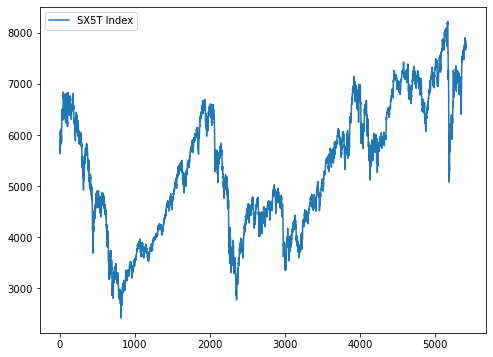

In [175]:
visualize(input_data, path="plot_folder")